# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

527

In [3]:
cities

['busselton',
 'la massana',
 'saint-pierre',
 'grand river south east',
 'rikitea',
 'lata',
 'lavrentiya',
 'marcona',
 'merauke',
 'kruisfontein',
 'kapaa',
 'cape town',
 'harper',
 'broome',
 'bluff',
 'mataura',
 'sikonge',
 'maragogi',
 'zhigansk',
 'challapata',
 'fort-shevchenko',
 'illoqqortoormiut',
 'hobart',
 'moindou',
 'baykit',
 'iracoubo',
 'atuona',
 'padang',
 'port alfred',
 'mtambile',
 'punta arenas',
 'dinsor',
 'kamenka',
 'namibe',
 'yellowknife',
 'haines junction',
 'bredasdorp',
 'ushuaia',
 'arlit',
 'kaitangata',
 'tasiilaq',
 'amderma',
 'puerto ayora',
 'lobito',
 'kodiak',
 'cidreira',
 'casa nova',
 'upernavik',
 'pisco',
 'butaritari',
 'parry sound',
 'fortuna',
 'tingi',
 'vaini',
 'mazagao',
 'kikwit',
 'qaanaaq',
 'san luis',
 'ponta do sol',
 'camacha',
 'port hedland',
 'lieksa',
 'cherskiy',
 'hilo',
 'thompson',
 'chokurdakh',
 'gillette',
 'hofn',
 'hithadhoo',
 'mahebourg',
 'albany',
 'nuevitas',
 'dunedin',
 'maceio',
 'guerrero negro',
 '

In [3]:
print(api_key)

c031204c31aab2548bff94467874553c


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

city_data = []
cloudiness_data = []
humidity_data = []
lat_data = []
lon_data = []
temp_data = []
wind_speed_data = []
date_data = []


for city in cities :
    
    try:
        response = requests.get(url + "appid=" + api_key + "&units=" + units + "&q="+ city).json()
    
        
        cloudiness_data.append(response.get("clouds").get("all"))
        humidity_data.append(response.get("main").get("humidity"))
        lat_data.append(response.get("coord").get("lat"))
        lon_data.append(response.get("coord").get("lon"))
        temp_data.append(response.get("main").get("temp_max"))
        wind_speed_data.append(response.get("wind").get("speed"))
        date_data.append(response.get("dt"))
        city_data.append(response.get("name"))
    
    except:
        print("An exception occurred")
# print(stats)

An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An excepti

In [5]:
print(len(city_data), len(cloudiness_data), len(humidity_data), len(lat_data), len(temp_data), len(wind_speed_data))

471 471 471 471 471 471


In [9]:
# import pandas as pd
# import json
# import csv
# data = pd.DataFrame(stats)
# data.head()
# data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

weather_info = pd.DataFrame({"City Name" : city_data,
                             "Clouds" : cloudiness_data,
                             "Humidity" : humidity_data,
                             "Lat" : lat_data,
                             "Lon" : lon_data,
                             "Temperature" : temp_data,
                             "Wind Speed" : wind_speed_data,
                             "Date" : date_data
                            })
weather_info.head()

,City Name,Clouds,Humidity,Lat,Lon,Temperature,Wind Speed,Date
0,Seabra,17,24,-12.42,-41.77,85.54,8.30,1562433196
1,Waterloo,99,87,8.34,-13.07,78.16,23.13,1562433141
2,Mataura,80,85,-46.19,168.86,42.34,14.56,1562433196
3,Ushuaia,90,93,-54.81,-68.31,39.20,11.41,1562432931
4,Qaanaaq,83,53,77.48,-69.36,44.32,1.34,1562433197


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

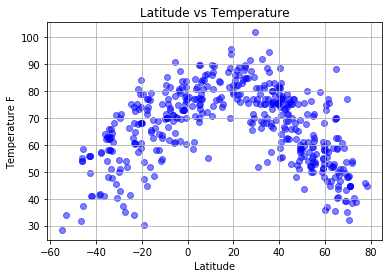

In [41]:
plt.scatter(weather_info["Lat"], weather_info["Temperature"], color='b', alpha=0.5, marker="o")
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature F")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

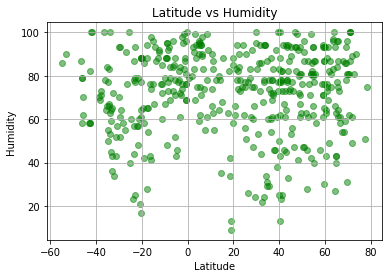

In [42]:
plt.scatter(weather_info["Lat"], weather_info["Humidity"], color='g', alpha=0.5, marker="o")
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

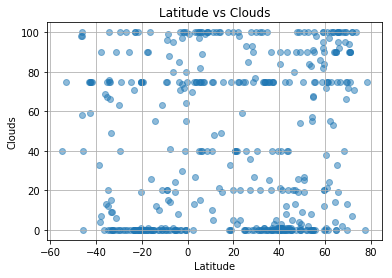

In [43]:
plt.scatter(weather_info["Lat"], weather_info["Clouds"], alpha=0.5, marker="o")
plt.title("Latitude vs Clouds")
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

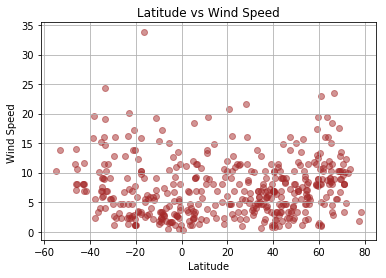

In [46]:
plt.scatter(weather_info["Lat"], weather_info["Wind Speed"], color='brown', alpha=0.5, marker="o")
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Wind Speed.png")

# Show plot
plt.show()

In [ ]:
# NOTE
# Temperature, humidity, wind speed are higher in areas close to the equator.
